In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from pandas import ExcelWriter
from pandas import ExcelFile

In [21]:
df=pd.read_excel("C:\\Users\\Pavillion\\Mall_Customers.xlsx")

In [22]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [24]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [25]:
df.rename(columns={'Annual Income (k$)':'Income','Spending Score (1-100)':'SpendScore'},inplace=True)

In [26]:
df.head()

,CustomerID,Gender,Age,Income,SpendScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


C:\Users\Pavillion\AppData\Local\Temp\ipykernel_22012\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

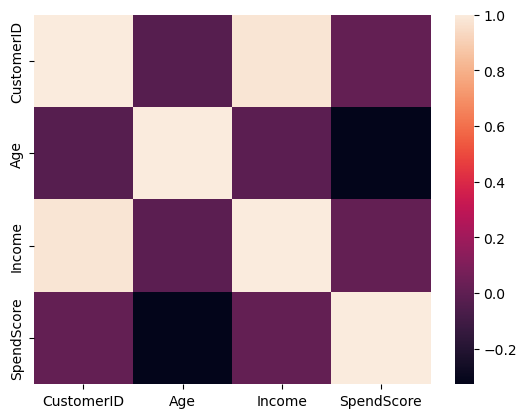

In [27]:
sns.heatmap(df.corr())

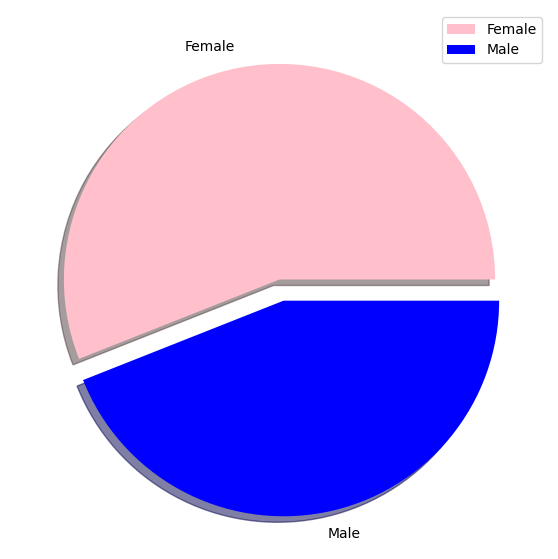

In [28]:
plt.figure(figsize=(7,7))
size=df['Gender'].value_counts()
label=['Female','Male']
color=['Pink','Blue']
explode=[0,0.1]
plt.pie(size,explode=explode,labels=label,colors=color,shadow=True)
plt.legend()
plt.show()

(array([0]), [Text(0, 0, '0')])

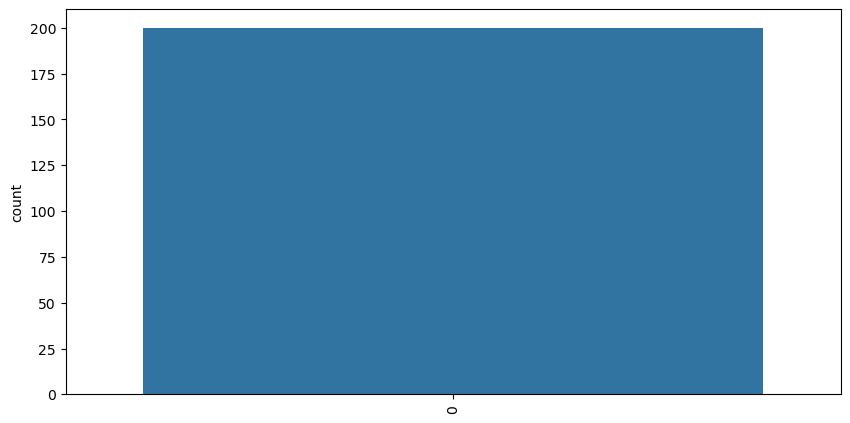

In [35]:
plt.figure(figsize=(10,5))
sns.countplot(df['Age'])
plt.xticks(rotation=90)

<Axes: >

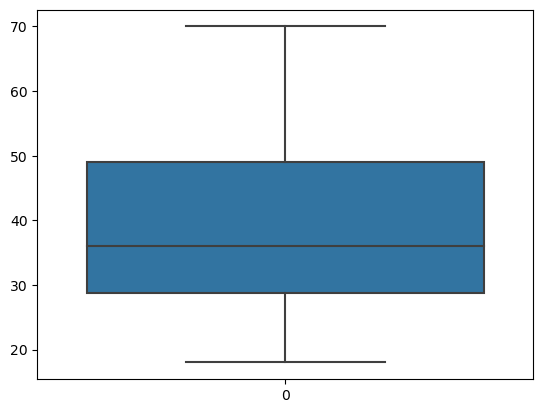

In [40]:
sns.boxplot(df['Age'])

Text(0, 0.5, 'Age')

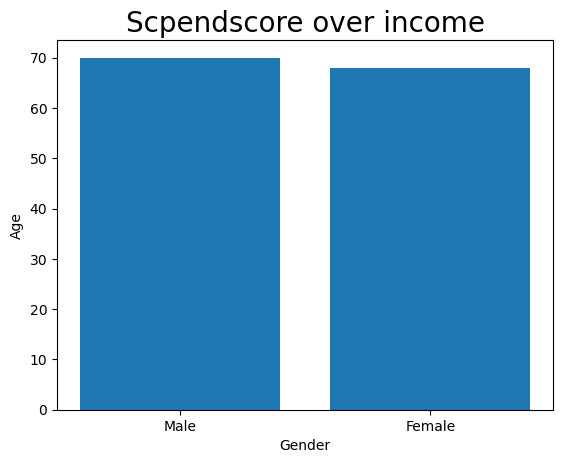

In [44]:
plt.bar(df['Gender'],df['Age'])
plt.title('Scpendscore over income',fontsize=20)
plt.xlabel('Gender')
plt.ylabel('Age')

In [45]:
df.head()

,CustomerID,Gender,Age,Income,SpendScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [84]:
x=df.iloc[:,[2,3]].values

In [85]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=3,min_samples=4,metric='euclidean')

In [86]:
model=db.fit(x)

In [87]:
label=model.labels_

In [88]:
label

array([ 0,  0,  0,  0, -1,  0,  1,  0, -1, -1, -1,  1, -1,  0,  1,  0,  1,
        0, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1,  2,  3,  2, -1,  2,  3,  3,  3,  2,
        3,  3, -1,  2,  2,  2,  4, -1,  2,  4, -1,  4, -1, -1, -1, -1,  4,
       -1, -1,  4, -1, -1, -1, -1, -1,  5, -1, -1,  5, -1, -1, -1,  5, -1,
        5, -1, -1, -1,  6, -1,  7,  6, -1, -1,  7,  6,  7,  6,  7,  7,  6,
        8,  7,  6,  7,  8, -1,  8,  8,  8,  7,  9,  7,  7,  7,  8,  6,  6,
        6, -1,  9,  9,  9, -1, 10,  9,  9, -1,  9, -1,  9, -1, 10, -1, 10,
       -1, 10, -1, -1, -1, 10, 10, 10, 10, 10, -1, 10, 10, 10, -1, 10, -1,
       10, -1, 10, 10, 10, 10, 10, -1, 10, -1, 10, -1, 11, -1, -1, 11, 12,
       -1, 12, 11, 11, -1, 12, -1, 12, -1, -1, -1, 13, -1, 13, -1, 13, -1,
       13, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [89]:
from sklearn import metrics

#Calculer le nombre de cluster

n_clusters=len(set(label))- (1 if -1 in label else 0)
print('No de clusters:',n_clusters)

No de clusters: 14


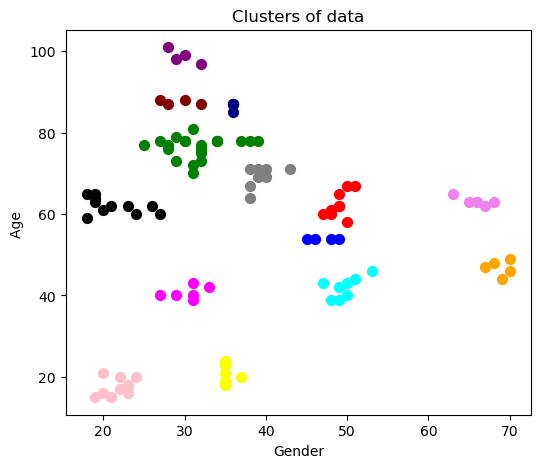

In [106]:
y_means = db.fit_predict(x)
plt.figure(figsize=(6,5))
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 50, c = 'pink')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 50, c = 'yellow')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 50, c = 'cyan')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 50, c = 'magenta')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 50, c = 'orange')
plt.scatter(x[y_means == 5, 0], x[y_means == 5, 1], s = 50, c = 'blue')
plt.scatter(x[y_means == 6, 0], x[y_means == 6, 1], s = 50, c = 'red')
plt.scatter(x[y_means == 7, 0], x[y_means == 7, 1], s = 50, c = 'black')
plt.scatter(x[y_means == 8, 0], x[y_means == 8, 1], s = 50, c = 'violet')
plt.scatter(x[y_means == 9, 0], x[y_means == 9, 1], s = 50, c = 'grey')
plt.scatter(x[y_means == 10, 0], x[y_means == 10, 1], s = 50, c = 'green')
plt.scatter(x[y_means == 11, 0], x[y_means == 11, 1], s = 50, c = 'navy')
plt.scatter(x[y_means == 12, 0], x[y_means == 12, 1], s = 50, c = 'maroon')
plt.scatter(x[y_means == 13, 0], x[y_means == 13, 1], s = 50, c = 'purple')
plt.xlabel('Gender')
plt.ylabel('Age ')
plt.title('Clusters of data')
plt.show()

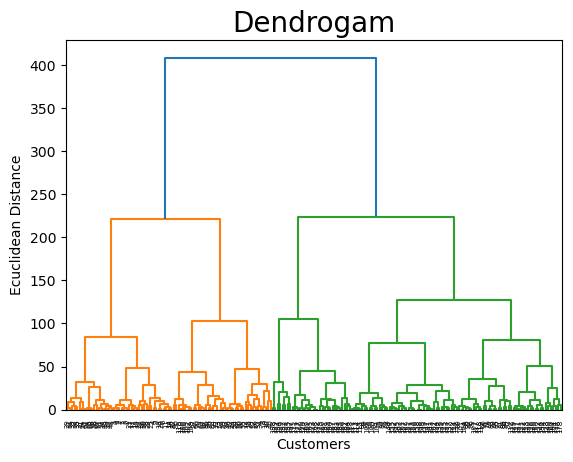

In [107]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


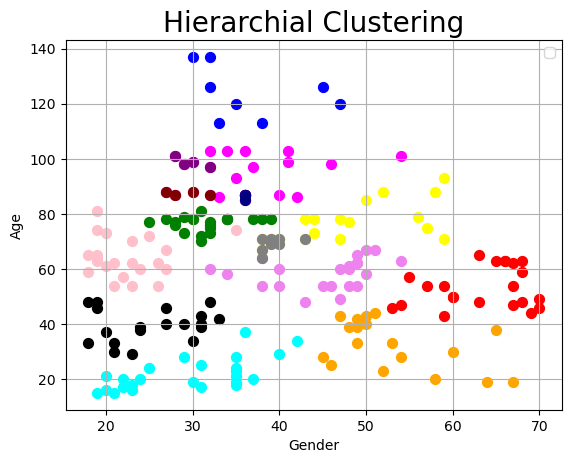

In [109]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 9, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 50, c = 'pink')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 50, c = 'yellow')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 50, c = 'cyan')
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s = 50, c = 'magenta')
plt.scatter(x[y_hc == 4, 0], x[y_hc == 4, 1], s = 50, c = 'orange')
plt.scatter(x[y_hc == 5, 0], x[y_hc == 5, 1], s = 50, c = 'blue')
plt.scatter(x[y_hc == 6, 0], x[y_hc == 6, 1], s = 50, c = 'red')
plt.scatter(x[y_hc == 7, 0], x[y_hc == 7, 1], s = 50, c = 'black')
plt.scatter(x[y_hc == 8, 0], x[y_hc == 8, 1], s = 50, c = 'violet')
plt.scatter(x[y_means == 9, 0], x[y_means == 9, 1], s = 50, c = 'grey')
plt.scatter(x[y_means == 10, 0], x[y_means == 10, 1], s = 50, c = 'green')
plt.scatter(x[y_means == 11, 0], x[y_means == 11, 1], s = 50, c = 'navy')
plt.scatter(x[y_means == 12, 0], x[y_means == 12, 1], s = 50, c = 'maroon')
plt.scatter(x[y_means == 13, 0], x[y_means == 13, 1], s = 50, c = 'purple')


plt.title('Hierarchial Clustering', fontsize = 20)
plt.xlabel('Gender')
plt.ylabel('Age')
plt.legend()
plt.grid()
plt.show()